# Noah Stasuik

## Research question/interests

I'm interested in exploring how a parent's education level affects their child's results on standardized exams. I feel that this is an important question to research since it could prove if someone's parents having a formal education gives an unfair advantage when it comes to standardized testing. Many universities around the world rely on standardized testing to determine acceptance and I believe that through selecting this research question I will be able to find if there are biases that exist when it comes to standardized testing.

If I have the change I am also going to take the opportunity to look at if the connection between standardized testing and parental education varies based on the subject that is being tested.

In [116]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_csv('../data/raw/exams.csv')

In [118]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67         

## Task 1 - Milestone 3 (Exploritory Data Analysis on the data set) + Task 2 Analysis Pipeline

##### I am going to start my EDA by getting rid of the columns that I won't need for the analysis and changing some of the columns that involve words to have numbers so that the correlations will be more accurate. 

I am also adding a column for average score that that I can look into general results instead of math, reading and writing scores seperately.

In [119]:
cols = list(df.columns)
df = df[cols[2:3] + cols[5:8]]
df = df.dropna(axis=0)
df['average score'] = round((df['math score'] + df['reading score'] + df['writing score']) /3, 2)
df['parental education#'] = df['parental level of education']
df['parental education#'] = df['parental education#'].replace(['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], [1, 2, 3, 4, 5, 6])
df

,parental level of education,math score,reading score,writing score,average score,parental education#
0,high school,67,67,63,65.67,2
1,some high school,40,59,55,51.33,1
2,some college,59,60,50,56.33,3
3,high school,77,78,68,74.33,2
4,associate's degree,78,73,68,73.00,4
...,...,...,...,...,...,...
995,high school,73,70,65,69.33,2
996,associate's degree,85,91,92,89.33,4
997,some high school,32,35,41,36.00,1
998,some college,73,74,82,76.33,3


        math score  reading score  writing score  average score  \
count  1000.000000    1000.000000    1000.000000    1000.000000   
mean     66.396000      69.002000      67.738000      67.712000   
std      15.402871      14.737272      15.600985      14.514123   
min      13.000000      27.000000      23.000000      21.670000   
25%      56.000000      60.000000      58.000000      58.585000   
50%      66.500000      70.000000      68.000000      67.330000   
75%      77.000000      79.000000      79.000000      78.330000   
max     100.000000     100.000000     100.000000     100.000000   

       parental education#  
count          1000.000000  
mean              3.053000  
std               1.498812  
min               1.000000  
25%               2.000000  
50%               3.000000  
75%               4.000000  
max               6.000000  


<AxesSubplot: >

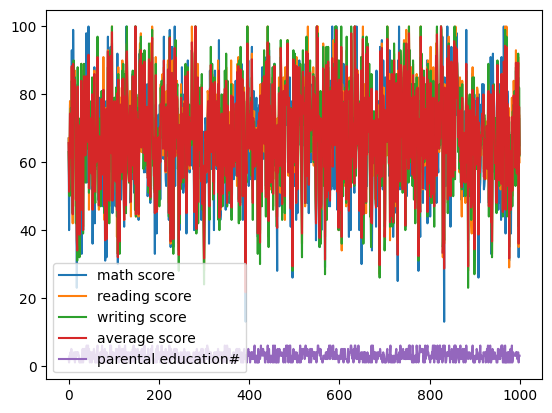

In [120]:
import seaborn as sns
print(df.describe())
df.plot()

To get a baseline understanding of my data I used the describe method to gain some insight about my data

In begining my EDA, I tried to figure out how to come up with useful ways to plot the data that I am working with for the project. I am leaving to the first plot I came up with to show the baseline I was starting out from and to show a representation of how not every plot works for the data that I'm analyzing.

In [121]:
list(df['parental level of education'].unique())

['high school',
 'some high school',
 'some college',
 "associate's degree",
 "bachelor's degree",
 "master's degree"]

##### Here I am running the .unique() method just to make sure that the dataset I am working with does not contain empty cells, making my analysis much more accurate!

,math score,reading score,writing score,average score,parental education#
math score,1.000000,0.819398,0.805944,0.919836,0.229113
reading score,0.819398,1.000000,0.954274,0.970217,0.224410
writing score,0.805944,0.954274,1.000000,0.966366,0.267894
average score,0.919836,0.970217,0.966366,1.000000,0.252994
parental education#,0.229113,0.224410,0.267894,0.252994,1.000000


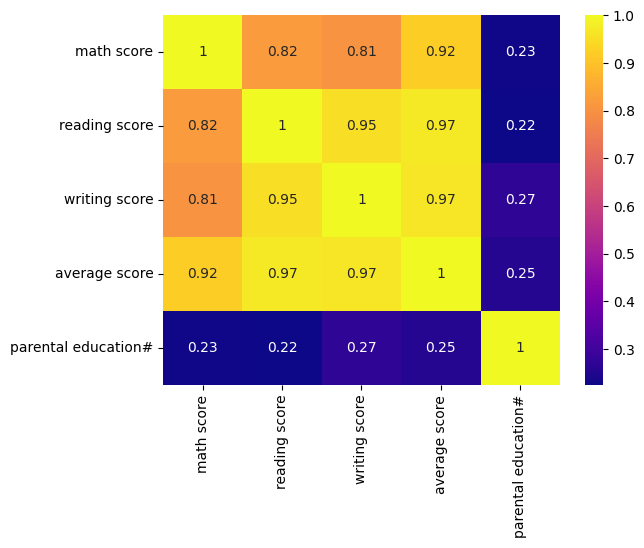

In [122]:
df1 = df
df1 = df1.drop(columns=['parental level of education'])
sns.heatmap(df1.corr(), annot=True, cmap='plasma')
df1.corr()

Before deciding on my charting method for my research I decided to create a heatmap to see the correlation that exists between all the variables I will be using to conduct my research. By using the heatmap I will be able to make an educated decision on how to properly plot / represent my data. From the heatmap I have learnt that there is strong correlation between how student perform in their classes with all of those correlations being abouve 0.8, which is quite high. From this I now know that using the mean for my data analysis will be a sound way of collecting my data. Since the numbers for parental level of education just represent, various stages of education, the heatmap doesn't tell me too much pertaining to the correlation between the education and grades, from what I can gather a chart such as a barplot will work well in my current position.

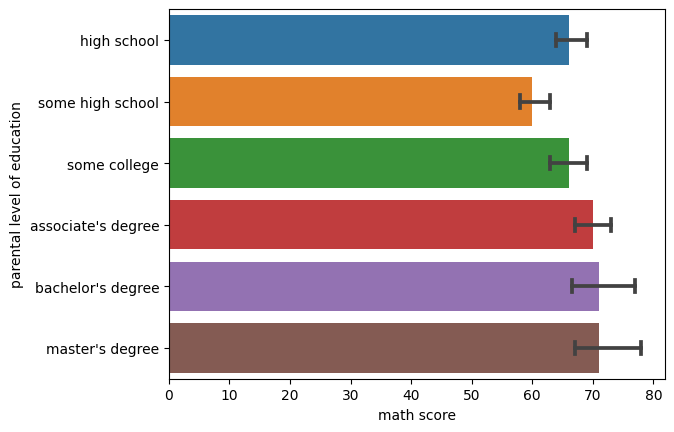

In [123]:
barplotMath = sns.barplot(y="parental level of education", x="math score", data=df, estimator=np.median, capsize=.2)
#This is interesting since I am starting to see the correlation between the parental Education in terms of all the subjects

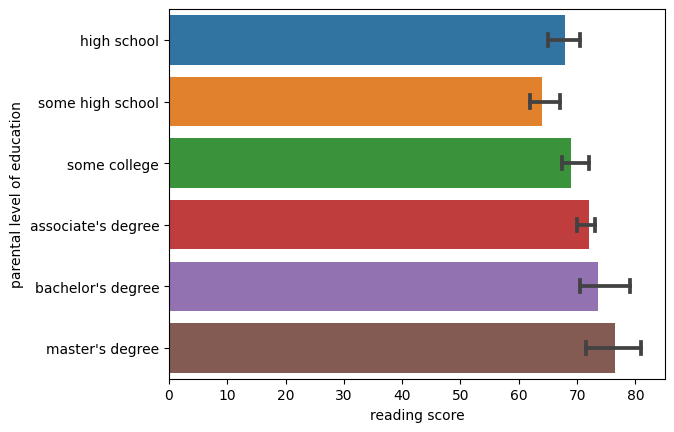

In [124]:
barplotReading = sns.barplot(y="parental level of education", x="reading score", data=df, estimator=np.median, capsize=.2)

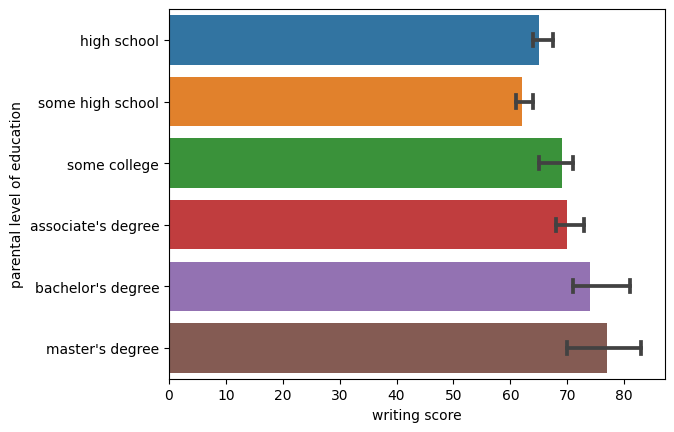

In [125]:
barplotWriting = sns.barplot(y="parental level of education", x="writing score", data=df, estimator=np.median, capsize=.2)

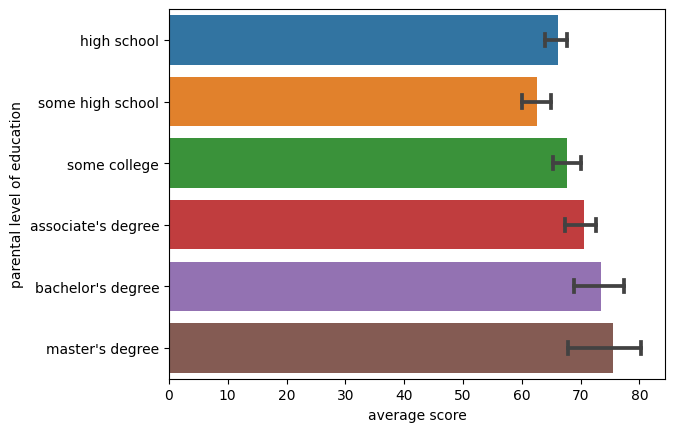

In [126]:
barplotAverage = sns.barplot(y="parental level of education", x="average score", data=df, estimator=np.median, capsize=.2)

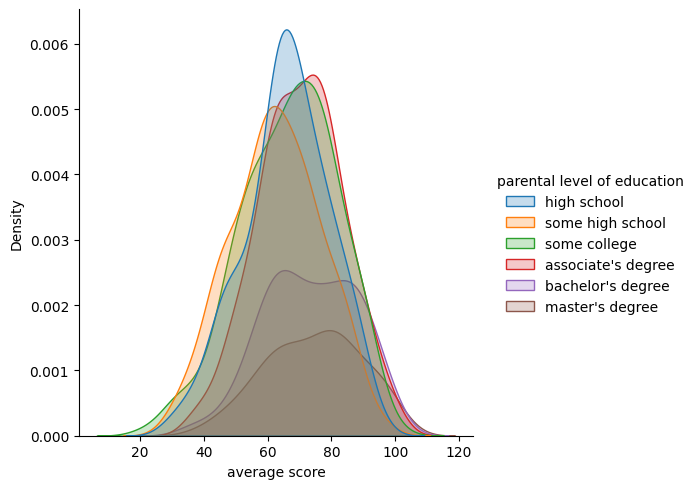

In [127]:
sns.displot(df, x="average score", hue="parental level of education", kind="kde", fill=True)

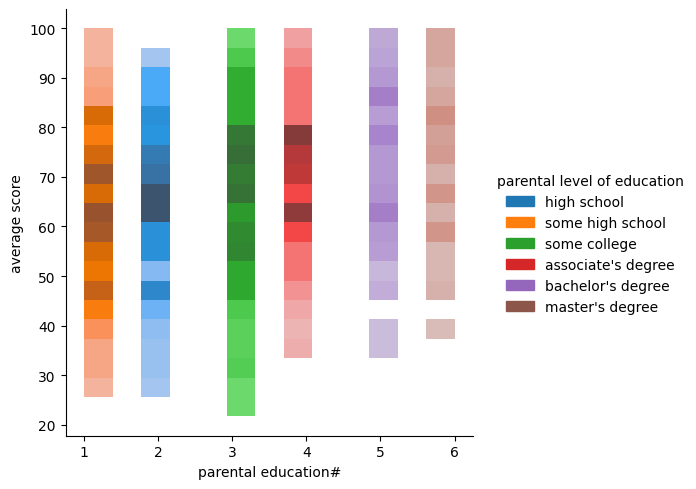

In [128]:
sns.displot(df, x='parental education#', y="average score", hue="parental level of education")

### In my Exploritory data analysis it is becoming evident that the barplot is a very useful tool in visualizing my data

##### As I assumed the parental education did have an effect on the test scores, which is refreshing too see in the data visualizations

In the 

# Task 3: Doing everything above, but now with method chaining

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

def load_and_process_before(df ='../data/raw/exams.csv'):
    df1 = pd.read_csv(df)
    df2 = (
        pd.read_csv(df)
        .drop(columns = ['gender','lunch','race/ethnicity', 'test preparation course'])
        .assign(average_score = round((df1['math score'] + df1['reading score'] + df1['writing score']) /3, 2))
        .dropna()  
        .assign(parental_education_n = df1['parental level of education'].replace(['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], [1, 2, 3, 4, 5, 6]))
    )
    return df2

load_and_process_before()


,parental level of education,math score,reading score,writing score,average_score,parental_education_n
0,high school,67,67,63,65.67,2
1,some high school,40,59,55,51.33,1
2,some college,59,60,50,56.33,3
3,high school,77,78,68,74.33,2
4,associate's degree,78,73,68,73.00,4
...,...,...,...,...,...,...
995,high school,73,70,65,69.33,2
996,associate's degree,85,91,92,89.33,4
997,some high school,32,35,41,36.00,1
998,some college,73,74,82,76.33,3


In [141]:
from project_functions1 import load_and_process
help(load_and_process())


Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 | 

# Task 4 (Overall Analysis)

Overall my 